In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import re

In [2]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [3]:
def one_word(word):
    if len(word)==1:
        return True
    else:
        return False

In [4]:
data = open("/Users/sing/Downloads/107-1PythonSampleCode-master/week_4/Reports/teco.txt", "r", encoding="utf-8")
data = data.read()

In [5]:
regex = re.compile(r'[\n\r\t]')
data = regex.sub(" ", data)
data.replace(" ","")
data


'股票代喝:1504   TECO 東元電子股份有眼公司     106年報  2017AnnualRepo吋                         節能 | 減排|智能|自動     民圖107.04.30刊印 公司網址:h前p:llwww.teco.com.tw 體交所「公閱讀訊觀測站」 個址:nttp:llnewmops.tse.com.tw 一、本公司發言人、代理發言人姓名、職稱、聯絡電話及電子郵件信箱： 發    言    人 姓名：葉文中 職稱：協理 電話：(02)2655-3333   轉  3318  分機 電子郵件信箱：speaker@teco.com.tw 代理發言人 姓名：簡世雄 職稱：副處長 電話：(02)2655-3333   轉  3542  分機 電子郵件信箱：ir@teco.com.tw 二、總公司、分公司、工廠之地址及電話： 總公司  地址：台北市南港區三重路 19-9  號 5  樓 電話：(02)2655-3333 中壢廠  地址：桃園市中壢區(中壢工業區)安東路 11  號 電話：(03)452-5101 觀音廠  地址：桃園市觀音區中山路一段 1568  之 1  號 電話：(03)473-4901 觀音二廠  地址：桃園市觀音區(觀音工業區)國建一路 6  號 電話：(03)483-2258 湖口廠  地址：新竹縣湖口鄉新竹工業區中華路 15  號 電話：(03)598-1711 三、股票過戶機構之名稱、地址、網址及電話： 名稱：台新國際商業銀行股務代理部 地址：台北市建國北路一段 96 號 B1 網址：http:// taishinbank.com.tw 電話：(02)2504-8125（分機 6301 ~ 6306） 四、最近年度財務報告簽證會計師姓名、事務所名稱、地址、網址及電話： 會計師姓名：吳郁隆、周建宏 會計師 事務所名稱：資誠聯合會計師事務所 地址：台北巿基隆路一段 333  號(國際貿易大樓)27   樓 電話：(02)2729-6666 網址：http://www.pwcglobal.com.tw 五、海外有價證券掛牌買賣之交易場所名稱及查詢該海外有價證券資訊之方式： 無 六、公司網址： http://www.teco.com.tw 年報目錄    壹、致股東報告書 ..............

In [6]:
seg_list = jieba.cut(data, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))  

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jr/jp2dd4ss0tbft8nd60g_4v7h0000gn/T/jieba.cache
Loading model cost 0.807 seconds.
Prefix dict has been built succesfully.


Default Mode: 股票/ 代喝/ :/ 1504/  /  /  / TECO/  / 東元/ 電子/ 股份/ 有眼/ 公司/  /  /  /  /  / 106/ 年報/  /  / 2017AnnualRepo/ 吋/  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  / 節能/  / |/  / 減排/ |/ 智能/ |/ 自動/  /  /  /  /  / 民圖/ 107.04/ ./ 30/ 刊印/  / 公司/ 網址/ :/ h/ 前/ p/ :/ llwww/ ./ teco/ ./ com/ ./ tw/  / 體交所/ 「/ 公閱/ 讀訊/ 觀測/ 站/ 」/  / 個址/ :/ nttp/ :/ llnewmops/ ./ tse/ ./ com/ ./ tw/  / 一/ 、/ 本/ 公司/ 發言人/ 、/ 代理/ 發言人/ 姓名/ 、/ 職稱/ 、/ 聯絡/ 電話/ 及/ 電子/ 郵件/ 信箱/ ：/  / 發/  /  /  /  / 言/  /  /  /  / 人/  / 姓名/ ：/ 葉/ 文中/  / 職稱/ ：/ 協理/  / 電話/ ：/ (/ 02/ )/ 2655/ -/ 3333/  /  /  / 轉/  /  / 3318/  /  / 分機/  / 電子/ 郵件/ 信箱/ ：/ speaker/ @/ teco/ ./ com/ ./ tw/  / 代理/ 發言人/  / 姓名/ ：/ 簡/ 世雄/  / 職稱/ ：/ 副/ 處長/  / 電話/ ：/ (/ 02/ )/ 2655/ -/ 3333/  /  /  / 轉/  /  / 3542/  /  / 分機/  / 電子/ 郵件/ 信箱/ ：/ ir/ @/ teco/ ./ com/ ./ tw/  / 二/ 、/ 總/ 公司/ 、/ 分公司/ 、/ 工廠/ 之/ 地址/ 及/ 電話/ ：/  / 總/ 公司/  /  / 地址/ ：/ 台北市/ 南港/ 區/ 三重/ 路/  / 19/ -/ 9/  /  / 號/  / 5/  /  / 樓/  / 電話/ ：/ (/ 02/ )/ 2655/ -/ 3333/  / 中壢廠/  /  / 地址

In [7]:
new_data=""
for d in data:
    if is_chinese(d):
        new_data+=d

In [8]:
stopwords = ['我', '對', '\n',"集團","股份","或","資產","有限公司","年度","公司","準則","註","之","及","於","年","月","日","民國","金","包含","型","第號","機","未","新","型","本","為","在","已","可能","時","解釋",
             "支付","當現"," ","係","與","按","所","致","董","災","校","以","該","有"]

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

addword = ["或有負債","不動產廠房及設備","馬達","其他綜合損益","無形資產","新台幣","附註","視聽","合併","東元電機","股份有限公司","財務報表","國際","國際會計準則","仟元","資產","理事會","國外營運機構","財務","所得稅",
           "績效","貨幣","表達","項目","融資","評估","財務報告","業務","生產性植物","其他","遞延","帳戶","聯合營運","揭露","財務報導","確定福利計畫","可回收金額","損益","收入","費用","客戶","合約","營運","融資",
           "換算","機構","公允價值","可靠","衡量","折現","攤銷後成本","避險會計","公司債","淨變現價值","決定","製成品","重大","設立","公司治理","租賃","承租人","歸屬","編製","負債","合併報表","備供出售","金融",
           "透過其他綜合損益","發佈","修正","機械","民國"]

delword = ["董致","致型","致","致致","災致","校董","董校","日月","災型","董災","災災","型型","董型","致校","校型","校致","外本","致災","綜合損","衡之融","非動","權法","及其","日止"]
for w in addword:
    jieba.add_word(w, freq=None, tag=None)
for w in delword:
    jieba.del_word(w)

In [9]:
seg_list = jieba.cut(new_data, cut_all=False)
seg_list = list(seg_list)
print(seg_list)
oneWord = list()
for word in seg_list:
    if one_word(word) and (word not in oneWord):
        oneWord.append(word)


['股票', '代喝', '東元', '電子', '股份', '有眼', '公司', '年報', '吋', '節能', '減排', '智能', '自動民圖', '刊印', '公司', '網址', '前體', '交所公閱', '讀訊', '觀測', '站', '個址', '一本', '公司', '發言人', '代理', '發言人', '姓名', '職稱', '聯絡', '電話', '及', '電子', '郵件', '信箱', '發言人', '姓名', '葉', '文中', '職稱', '協理', '電話', '轉分', '機電子', '郵件', '信箱', '代理', '發言人', '姓名', '簡', '世雄', '職稱', '副', '處長', '電話', '轉分', '機電子', '郵件', '信箱', '二', '總', '公司', '分公司', '工廠', '之', '地址', '及', '電話', '總', '公司地址', '台北市', '南港', '區', '三重', '路號', '樓', '電話', '中壢廠', '地址', '桃園市', '中壢區', '中壢', '工業', '區安東', '路號', '電話', '觀音廠', '地址', '桃園', '市觀', '音區', '中山路', '一段', '之號', '電話', '觀音', '二廠', '地址', '桃園', '市觀', '音區', '觀音', '工業區', '國建', '一路', '號電話', '湖口', '廠', '地址', '新竹', '縣', '湖口', '鄉', '新竹', '工業區', '中華路', '號電話', '三', '股票', '過戶', '機構', '之名', '稱', '地址', '網址', '及', '電話', '名稱', '台', '新', '國際', '商業', '銀行', '股務', '代理', '部', '地址', '台北市', '建國', '北路', '一段', '號網址', '電話', '分機', '四', '最近', '年度', '財務報告', '簽證會', '計師', '姓名', '事務', '所名', '稱', '地址', '網址', '及', '電話會', '計師', '姓名', '吳郁', '周建宏會', '計師', '事務', '所名', '

In [10]:
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs) and (w not in oneWord):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten

[('董事', 1014),
 ('其他', 420),
 ('負債', 393),
 ('投資', 297),
 ('企業', 284),
 ('東元電機', 275),
 ('國際', 260),
 ('公允價值', 255),
 ('股份有限公司', 211),
 ('收入', 201),
 ('情形', 196),
 ('東元', 193),
 ('財務', 185),
 ('相關', 180),
 ('馬達', 177),
 ('所得稅', 176),
 ('重大', 173),
 ('資訊', 170),
 ('合約', 169),
 ('控制', 168),
 ('成本', 166),
 ('合併', 162),
 ('設備', 160),
 ('費用', 157),
 ('評估', 157),
 ('項目', 152),
 ('子公司', 148),
 ('市場', 148),
 ('影響', 147),
 ('工程', 141),
 ('查核', 138),
 ('計師', 137),
 ('主要', 136),
 ('新台幣', 136),
 ('借款', 135),
 ('工具', 134),
 ('業務', 130),
 ('單位', 130),
 ('採用', 130),
 ('營業', 127),
 ('取得', 119),
 ('營運', 117),
 ('財務報表', 115),
 ('持有', 112),
 ('仟元', 110),
 ('科技', 110),
 ('如下', 106),
 ('技術', 102),
 ('總額', 102),
 ('損失', 100),
 ('變動', 98),
 ('退休', 97),
 ('是否', 96),
 ('本期', 96),
 ('減損', 96),
 ('風險', 95),
 ('政策', 95),
 ('提供', 94),
 ('適用', 94),
 ('持股', 93),
 ('開發', 92),
 ('產品', 90),
 ('財務報告', 89),
 ('經營', 86),
 ('財務報導', 85),
 ('所有', 83),
 ('台灣', 81),
 ('機械', 80),
 ('規定', 80),
 ('發展', 79),
 ('部分', 79),
 ('認為', 7

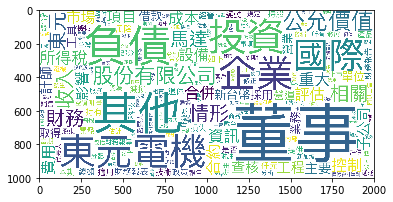

In [11]:
font = "/System/Library/Fonts/PingFang.ttc"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)
wordcloud.to_file('week4.png')

In [12]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])


([<matplotlib.axis.XTick at 0x1092d5550>,
 <a list of 10 Text xticklabel objects>)

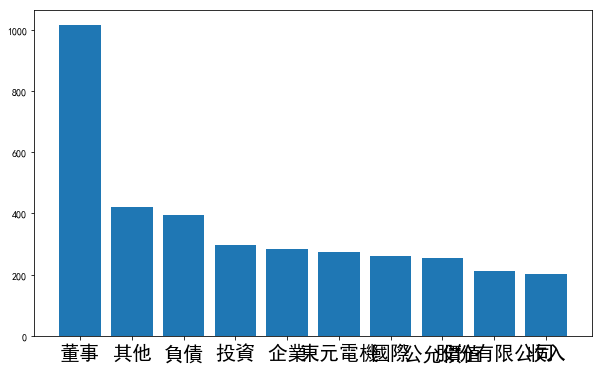

In [13]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)